In [3]:
import sys

import numpy as np
import pandas as pd
import pytest

import connectfour as c4
from connectfour import game

FIGDIR = '../visualizations/'
LOGPATH = '../logs/compete/compete.log'

%load_ext autoreload
%autoreload 2

In [4]:
def generate_test_state(played_positions: list[int]) -> game.ConnectFourGameState:
    """allows to generate a state, based on a succession of moves."""
    board = np.zeros(shape=(6,7), dtype=int)
    state = game.ConnectFourGameState(board, next_player=game.Player.x)
    for position in played_positions:
        action = game.ConnectFourAction(position, state.next_player)
        state = state.move(action)
    return state

pvn = c4.pvnet.PolicyValueNet.from_file(filename='../models/gen9.h5')

Metal device set to: Apple M1 Pro
To see model details, enter:
	>>> <pvn>.summary()


2022-04-09 22:43:48.969728: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-09 22:43:48.969836: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# define policy evaluator
pvn = c4.pvnet.PolicyValueNet.from_file(filename='../models/gen9.h5')
# instantiate new player using that policy
player = c4.player.AzPlayer(pvn)

# 
# state = c4.game.ConnectFourGameState()
state = generate_test_state([0,0,0,0,0,0,3,3])
node = c4.mcts.MctsNode(state)
action, policy = player.play_single_turn(node, tau=1, n_sims=100)

To see model details, enter:
	>>> <pvn>.summary()


2022-04-09 22:43:50.405181: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-09 22:43:50.455732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [6]:
state.game_config.shape

(6, 7)

In [5]:
node = c4.mcts.MctsNode(state)
mcts = c4.mcts.TruncatedMCTS(evaluator=pvn, root=node, tau=1)
actions, policy = mcts.policy_improvement(100)
policy

array([0.17, 0.45, 0.29, 0.06, 0.02, 0.01])

In [54]:
print(state)
print(pvn.infer_from_state(state)[0].round(2))
print(policy.round(2))

ConnectFourGameState(board:
  O  .  .  .  .  .  .
  X  .  .  .  .  .  .
  O  .  .  .  .  .  .
  X  .  .  .  .  .  .
  O  .  .  O  .  .  .
  X  .  .  X  .  .  .
	next_player=x
[0.   0.31 0.17 0.4  0.06 0.05 0.01]
[0.   0.21 0.54 0.2  0.03 0.02 0.  ]


In [6]:
pvn = c4.pvnet.PolicyValueNet.from_file(filename='../models/gen9.h5')
state = generate_test_state([0,0,0,0,0,0,3,3])
# state = c4.game.ConnectFourGameState()
node = c4.mcts.MctsNode(state, pvn)

2022-04-01 21:48:41.223767: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-01 21:48:41.223886: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-01 21:48:41.398923: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1 Pro
To see model details, enter:
	>>> <pvn>.summary()


2022-04-01 21:48:41.455841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [23]:
agent = c4.player.AzPlayer(evaluator=pvn)

In [26]:
agent.play_single_turn(node, tau=1, n_sims=100)

(MCTS Action:(Move:x:2 p:1),
 array([0.   , 0.22 , 0.475, 0.235, 0.035, 0.03 , 0.005]))

In [15]:
node.actions[0].take_action()

MCTS NODE: 
ConnectFourGameState(board:
  O  .  .  .  .  .  .
  X  .  .  .  .  .  .
  O  .  .  .  .  .  .
  X  .  .  .  .  .  .
  O  .  .  O  .  .  .
  X  X  .  X  .  .  .
	next_player=o
-0.8993

In [ ]:
node.actions[0].take_action

In [40]:
pvn.infer_from_state(state)

(array([6.2156164e-07, 3.1485549e-01, 1.7112859e-01, 3.9579022e-01,
        6.0913935e-02, 4.5763090e-02, 1.1548061e-02], dtype=float32),
 0.12272568792104721)

In [42]:
mcts = c4.mcts.MCTS(node)
%time mcts.policy_improvement(400)

CPU times: user 7.9 s, sys: 901 ms, total: 8.8 s
Wall time: 8.85 s


([MCTS Action:(Move:x:1 p:1),
  MCTS Action:(Move:x:2 p:1),
  MCTS Action:(Move:x:3 p:1),
  MCTS Action:(Move:x:4 p:1),
  MCTS Action:(Move:x:5 p:1),
  MCTS Action:(Move:x:6 p:1)],
 array([0.2075, 0.54  , 0.1975, 0.0275, 0.025 , 0.0025]))

In [53]:
tau = c4.player.TemperatureSchedule(tau_start=1, tau_end=.1, threshold=10)

In [69]:
def assess_user_move(user_input: str, state: c4.game.ConnectFourGameState) -> dict:
    """returns a dictionary with the input type (VALID, INVALID, EXIT), the error message"""
    if user_input.lower() == 'x':
        return {'type': 'EXIT', 'message': None}
    if not user_input.isnumeric():
        return {'type': 'INVALID', 'message': 'you need to enter an integer between 0 and 6'}
    col = int(user_input)
    if (col > 6) | (col < 0):
        return {'type': 'INVALID', 'message': 'you need to enter an integer between 0 and 6'}
    action = c4.game.ConnectFourAction(x_coordinate=col, player=state.next_player)
    if not state.is_move_legal(action):
        return {'type': 'INVALID', 'message': 'this column is already full'}
    return {'type': 'VALID', 'message': None}

state = generate_test_state([0,0,0,0,0,0,3])
print(assess_user_move(user_input="X", state=state))
print(assess_user_move(user_input="cd", state=state))
print(assess_user_move(user_input="43", state=state))
print(assess_user_move(user_input="0", state=state))
print(assess_user_move(user_input="1", state=state))

{'type': 'EXIT', 'message': None}
{'type': 'INVALID', 'message': 'you need to enter an integer between 0 and 6'}
{'type': 'INVALID', 'message': 'you need to enter an integer between 0 and 6'}
{'type': 'INVALID', 'message': 'this column is already full'}
{'type': 'VALID', 'message': None}


In [ ]:
def get_user_input(state):
    msg = """your turn! what column do you want to play in [0-6]? type X to exit"""
    user_input = input(msg)
    is_input_valid = assess_user_move(user_input, state)
    while is_input_valid['type'] == 'INVALID':
        user_input = input(is_input_valid['message'])
        is_input_valid = assess_user_move(user_input, state)
    if is_input_valid['type'] == 'EXIT':
        exit()
    elif is_input_valid['type'] == 'VALID':
        return int(user_input)
        
get_user_input(state)

In [67]:
col = int("43")
if (col > 6) | (col < 0):
    print({'type': 'INVALID', 'message': 'you need to enter an integer between 0 and 6'})

{'type': 'INVALID', 'message': 'you need to enter an integer between 0 and 6'}


In [52]:
tau[0], tau[9], tau[10], tau[41]

(1, 1, 0.1, 0.1)

In [ ]:
tau = c4.player.TemperatureSchedule

In [36]:
node.actions[3].N

468

In [10]:
import yaml

with open('../config.yaml', 'r') as f:
    config = yaml.safe_load(f)
    
config

{'name': 'test',
 'game': {'board': {'width': 7, 'height': 6}, 'n_to_win': 4},
 'pvn': {'block_size': 1, 'l2_const': '1e-4'},
 'training': {'dummy': 0},
 'mcts': {'C_PUCT': 4, 'sims': 100, 'tau': 1},
 'player': {'evaluator': 'models/gen9.h5'},
 'selfplay': {'tau_start': 1, 'tau_end': 0.1, 'threshold': 10},
 'paths': {'log': 'logs/', 'models': 'models/'}}

In [20]:
# define policy evaluator
evaluator = c4.pvnet.PolicyValueNet(filename='../models/gen9.h5', quiet=True)
# instantiate new player using that policy
player = c4.player.AzPlayer(evaluator)

# create empty board
board = c4.game.ConnectFourBoard()

state = c4.game.ConnectFourGameState(board)
node = c4.mcts.MctsNode(state, evaluator=evaluator)
action, policy = player.play(node, tau=.1, n_sims=400)
action, policy

To see model details, enter:
	>>> <pvn>.summary()


2022-03-17 21:34:39.634558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(MCTS Action:(Move:x:3 p:1),
 array([2.26683569e-21, 2.32123975e-08, 7.53781063e-08, 9.99999847e-01,
        4.78414838e-08, 6.10661483e-09, 1.30717169e-19]))

In [25]:
def generate_test_state(played_positions: list[int]) -> game.ConnectFourGameState:
    """allows to generate a state, based on a succession of moves."""
    board = np.zeros(shape=(6,7), dtype=int)
    state = game.ConnectFourGameState(board, next_player=game.Player.x)
    for position in played_positions:
        action = game.ConnectFourAction(position, state.next_player)
        state = state.move(action)
    return state

generate_test_state([1,2])

ConnectFourGameState(board:
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  X  O  .  .  .  .
	next_player=x

In [118]:
state.next_player

<Player.x: 1>

In [5]:
state = c4.game.ConnectFourGameState()
state = state.move(c4.game.ConnectFourAction(1,c4.game.Player.x))

In [14]:
generate_test_state([1,2]).__repr__()

'ConnectFourGameState(board:\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  X  O  .  .  .  .\n\tnext_player=x'

In [80]:
state = generate_test_state([3,3,2])
policy, value = evaluator.infer_from_state(state)
print(f"policy: {policy},\nexpected value: {value}")

node = c4.mcts.MctsNode(state=state, evaluator=evaluator)
az_player.play(node, tau=1, n_sims=400)

policy: [0.00693865 0.44742727 0.03963406 0.09377281 0.37541172 0.03537982
 0.00143565],
expected value: -0.1962100863456726


(MCTS Action:(Move:x:4 p:-1),
 array([0.0025, 0.2925, 0.005 , 0.0175, 0.675 , 0.0075, 0.    ]))

In [83]:
from tensorflow.keras.utils import plot_model

plot_model(evaluator.model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [102]:
def infer_from_sequence(moves: list[int]) -> policy:
    state = generate_test_state(moves)
    p, v = evaluator.infer_from_state(state)
    return p.round(2), round(v, 3)

infer_from_sequence([3])

(array([0.02, 0.05, 0.16, 0.55, 0.1 , 0.09, 0.02], dtype=float32), -0.037)

### Test `run_game` and strategies

100%|███████████████████████████████████████| 200/200 [00:00<00:00, 1278.84it/s]


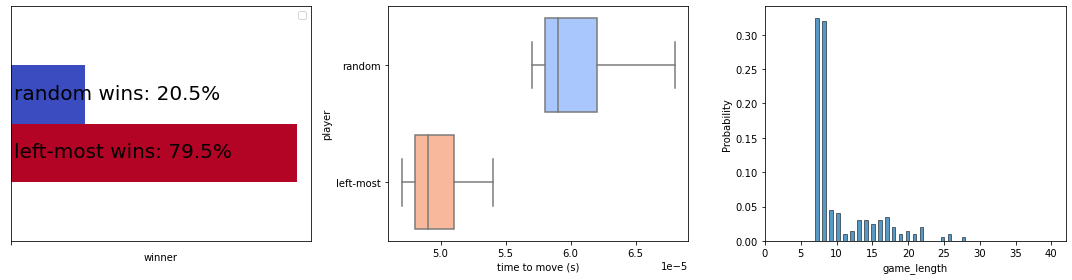

In [55]:
outcomes = c4.compete.compare_strategies(strat1=c4.strategies.random_strategy,
                                         strat2=c4.strategies.leftmost_strategy, 
                                         n_games=200)

# plot outcomes
c4.compete.plot_strat_competition_outcomes(outcomes, 'random', 'left-most')

<AxesSubplot:xlabel='avg_move_duration', ylabel='Proportion'>

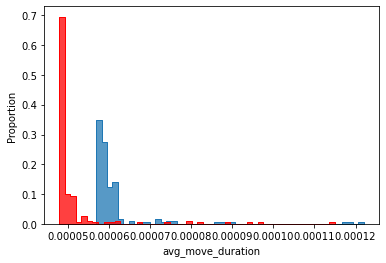

In [128]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(outcomes.avg_move_duration.apply(lambda x: x[0]), element='step', bins=50, ax=ax, stat='proportion')
sns.histplot(outcomes.avg_move_duration.apply(lambda x: x[1]), element='step', bins=50, ax=ax, color='red', stat='proportion')

In [61]:
import itertools

pvn = c4.pvnet.PolicyValueNet.from_file('../models/gen9.h5')

strategies = {
    'random': c4.strategies.random_strategy,
    'leftmost': c4.strategies.leftmost_strategy,
    'raw_pvn_tau=1': c4.strategies.RawPVNetStrategy(pvn, temperature=1).select_action,
    'raw_pvn_tau=0.1': c4.strategies.RawPVNetStrategy(pvn, temperature=.1).select_action,
}  


results = c4.compete.tournament(strategies, 100) # should save results to folder

To see model details, enter:
	>>> <pvn>.summary()
random vs leftmost
100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1518.53it/s]
random wins 15.0% of the time

random vs raw_pvn_tau=1
  0%|                                                   | 0/100 [00:00<?, ?it/s]

2022-04-02 22:37:30.322791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100%|█████████████████████████████████████████| 100/100 [00:17<00:00,  5.70it/s]
random wins 4.0% of the time

random vs raw_pvn_tau=0.1
100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.18it/s]
random wins 0.0% of the time

leftmost vs raw_pvn_tau=1
100%|█████████████████████████████████████████| 100/100 [00:11<00:00,  8.34it/s]
leftmost wins 10.0% of the time

leftmost vs raw_pvn_tau=0.1
100%|█████████████████████████████████████████| 100/100 [00:10<00:00,  9.33it/s]
leftmost wins 0.0% of the time

raw_pvn_tau=1 vs raw_pvn_tau=0.1
100%|█████████████████████████████████████████| 100/100 [01:16<00:00,  1.30it/s]
raw_pvn_tau=1 wins 23.0% of the time



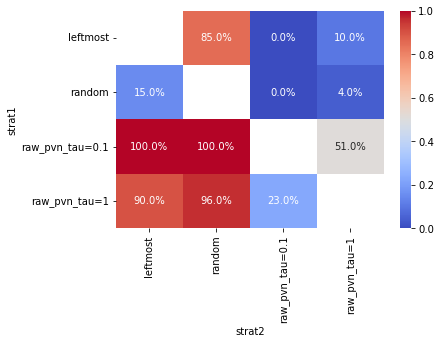

In [62]:
c4.compete.show_tournament_results(results)

## Test raw PVNet vs random

To see model details, enter:
	>>> <pvn>.summary()
  2%|▉                                           | 1/50 [00:00<00:11,  4.32it/s]

2022-03-28 22:12:59.109174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100%|███████████████████████████████████████████| 50/50 [00:06<00:00,  8.29it/s]


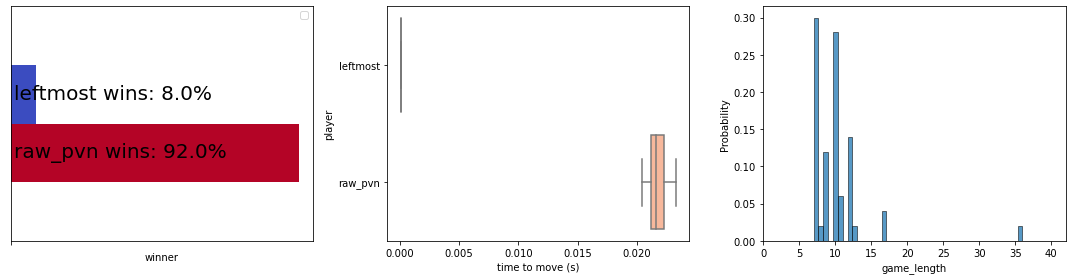

In [7]:
# define policy value net
pvn = c4.pvnet.PolicyValueNet.from_file('../models/gen9.h5')

# simulate 200 games
outcomes = c4.compete.compare_strategies(strat1=c4.strategies.leftmost_strategy, 
                                         strat2=c4.strategies.RawPVNetStrategy(pvn, temperature=1).select_action, 
                                         n_games=50)

# plot outcomes
c4.compete.plot_strat_competition_outcomes(outcomes, 'leftmost', 'raw_pvn')

## Compare RawPVNet with different temperatures

100%|█████████████████████████████████████████| 200/200 [02:41<00:00,  1.24it/s]


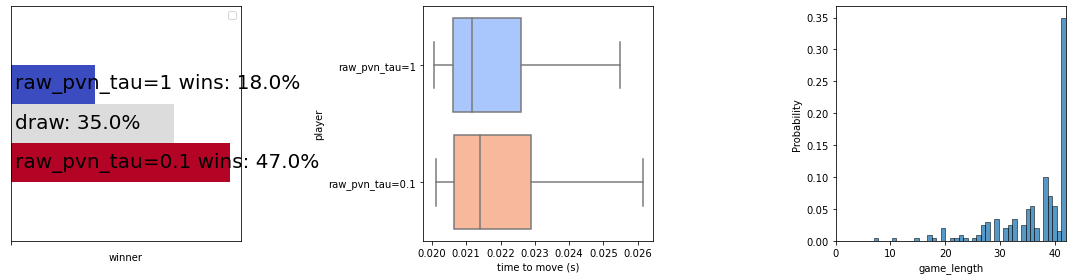

In [8]:
# simulate 200 games
outcomes = c4.compete.compare_strategies(strat1=c4.strategies.RawPVNetStrategy(pvn, temperature=1).select_action,
                                         strat2=c4.strategies.RawPVNetStrategy(pvn, temperature=.1).select_action, 
                                         n_games=200)

# plot outcomes
c4.compete.plot_strat_competition_outcomes(outcomes, 'raw_pvn_tau=1', 'raw_pvn_tau=0.1')

In [96]:
state = c4.game.ConnectFourGameState()
node = c4.mcts.MctsNode(state, evaluator=pvn)

In [97]:
mcts = c4.mcts.MCTS(node, tau=1)
mcts.policy_improvement(100)

print('number of visits from root after MCTS:', [action.N for action in node.actions])

action = node.actions[3]
n1 = action.take_action(prune=True)
print('number of visits after selecting 4th action:', [action.N for action in n1.actions])

number of visits from root after MCTS: [1, 19, 13, 44, 14, 8, 1]
number of visits after selecting 4th action: [1, 1, 10, 24, 5, 1, 1]


In [98]:
print('re-running MCTS after selecting 4th column:')
mcts = c4.mcts.MCTS(n1, tau=1)
actions, policy = mcts.policy_improvement(100)
print('number of visits after rerunning MCTS:', [action.N for action in n1.actions])

re-running MCTS after selecting 4th column:
number of visits after rerunning MCTS: [1, 2, 33, 68, 31, 7, 1]


In [99]:
sum([action.N for action in n1.actions])

143

In [101]:
generate_test_state([2,0,3,0,4])

ConnectFourGameState(board:
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  O  .  .  .  .  .  .
  O  .  X  X  X  .  .
	next_player=o

In [114]:
state = generate_test_state([4,0,3,0,5,3])
print(state)
policy, value = pvn.infer_from_state(state)
policy.round(2), round(value, 3)

ConnectFourGameState(board:
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  O  .  .  O  .  .  .
  O  .  .  X  X  X  .
	next_player=x


(array([0.  , 0.  , 0.1 , 0.02, 0.  , 0.01, 0.87], dtype=float32), 1.0)

In [122]:
node = c4.mcts.MctsNode(state, evaluator=pvn)
mcts = c4.mcts.MCTS(node, tau=2)
_, mcts_policy = mcts.policy_improvement(200)
mcts_policy

array([0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.75])

In [120]:
[action.N for action in node.actions]

[0, 0, 20, 0, 0, 0, 180]

In [7]:
def compete_and_plot(strat1, strat2, n_games: int = 100, log: bool = True):
    logpath = LOGPATH if log else None
    figdir = FIGDIR if log else None
    
    outcomes = c4.compete.play_multi_h2h_games(strat1=strat1,
                                               strat2=strat2,
                                               n_games=n_games,
                                               logpath=logpath)
    # plot outcomes
    c4.compete.plot_strat_competition_outcomes(outcomes, figdir=figdir)

## Test Random vs LeftMost

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1443.43it/s]


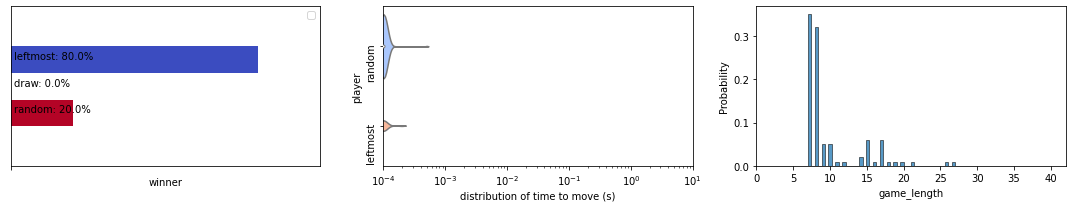

In [9]:
# simulate a few games
compete_and_plot(strat1=c4.strategies.RandomStrategy(),
                 strat2=c4.strategies.LeftMostStrategy(), log=False)


## Read from logs

In [10]:
logreader = c4.logging.LogReader(LOGPATH)
logreader.list_h2h()

leftmost_vs_random                  100
leftmost_vs_raw_pvn                 100
az_20_vs_raw_pvn                    100
az_100_vs_az_20                     100
az_100_vs_az_200                    100
az_200_vs_az_400                    100
az_100_1-0-1_vs_az_100_1-10-01      100
az_100_01-0-01_vs_az_100_1-10-01    100
dtype: int64

## LeftMost vs RawPVN

100%|█████████████████████████████████████████| 100/100 [00:12<00:00,  8.06it/s]


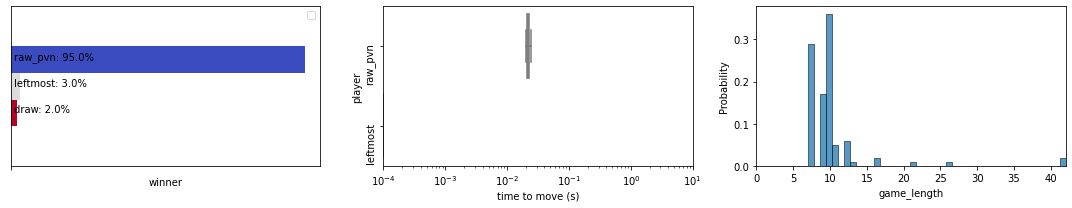

In [257]:
# simulate a few games
compete_and_plot(strat1=c4.strategies.RawPVNetStrategy(pvn, temperature=.8),
                 strat2=c4.strategies.LeftMostStrategy())

## Define AlphaZero strategies

In [47]:
# using identical temperature schedule
temperature_schedule = c4.temperature.TemperatureSchedule()
az_strat = {}
for n in [20,100,200,400]:
    az_strat[n] = c4.strategies.MctsPvnStrategy(evaluator=pvn, 
                                                temperature_schedule=temperature_schedule,
                                                n_sims=n)

raw_strat = c4.strategies.RawPVNetStrategy(pvn, temperature=.8)

## RawPVN vs AzAgent: What is the benefit of Truncated MCTS on top of raw evaluator?

100%|█████████████████████████████████████████| 100/100 [10:22<00:00,  6.22s/it]


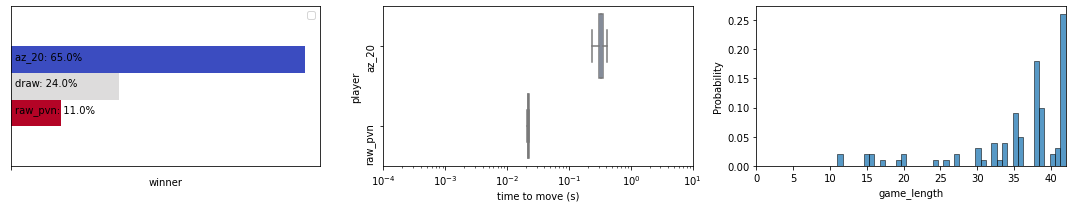

In [266]:
# AzAgent with 20 simulations vs raw evaluator
compete_and_plot(strat1=az_strat[20],
                 strat2=raw_strat)

## How much stronger is an agent doing more simulations?

100%|█████████████████████████████████████████| 100/100 [51:37<00:00, 30.97s/it]


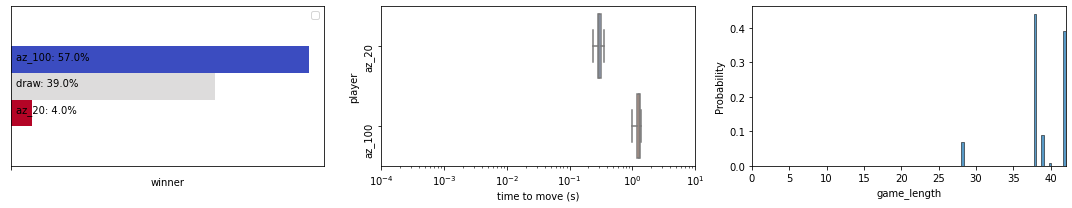

In [267]:
compete_and_plot(strat1=az_strat[20],
                 strat2=az_strat[100])

100%|███████████████████████████████████████| 100/100 [1:58:49<00:00, 71.30s/it]


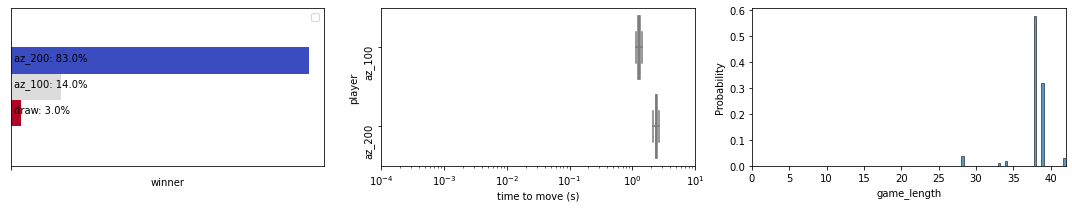

In [268]:
compete_and_plot(strat1=az_strat[100],
                 strat2=az_strat[200])

100%|██████████████████████████████████████| 100/100 [4:08:09<00:00, 148.89s/it]


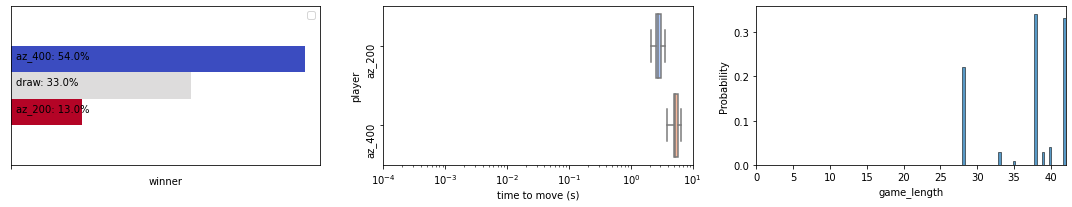

In [269]:
compete_and_plot(strat1=az_strat[200],
                 strat2=az_strat[400])

## Compare Various temperature schedules

In [8]:
temperatures = {'1-0-1': (1,0,1), '1-10-01': (1,10,.1), '01-0-01': (.1,0,.1)}

az_tau = {}

n = 100

for label, parameters in temperatures.items():
    az_tau[label] = c4.strategies.MctsPvnStrategy(evaluator=pvn, 
                                                  temperature_schedule=c4.temperature.TemperatureSchedule(*parameters),
                                                  n_sims=n)
az_tau

{'1-0-1': MctsPvnStrategy(evaluator=gen9, n_sims=100, tau=1-0-1),
 '1-10-01': MctsPvnStrategy(evaluator=gen9, n_sims=100, tau=1-10-01),
 '01-0-01': MctsPvnStrategy(evaluator=gen9, n_sims=100, tau=01-0-01)}

  0%|                                                    | 0/64 [00:00<?, ?it/s]

2022-04-08 21:34:52.214232: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-08 21:34:52.271373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100%|███████████████████████████████████████████| 64/64 [48:50<00:00, 45.79s/it]


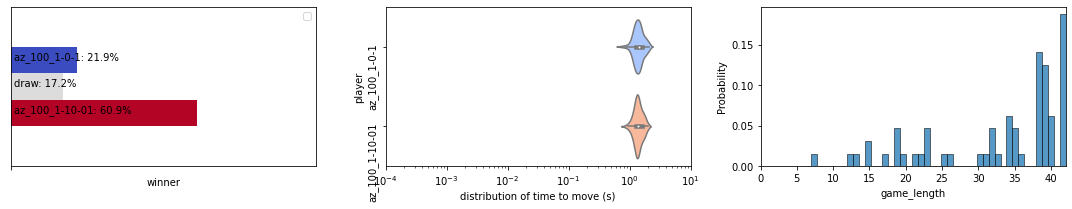

In [9]:
compete_and_plot(strat1=az_tau['1-0-1'],
                 strat2=az_tau['1-10-01'],
                 n_games=64)

100%|███████████████████████████████████████| 100/100 [1:20:34<00:00, 48.35s/it]


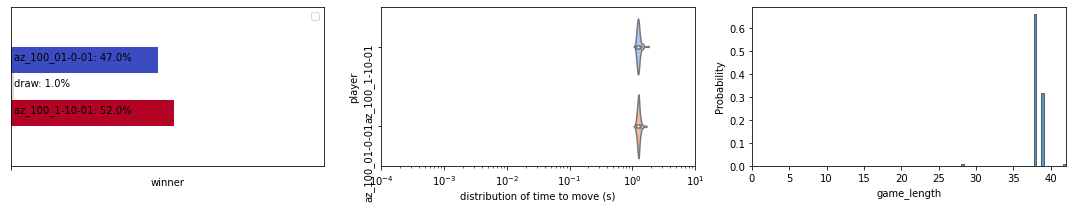

In [10]:
compete_and_plot(strat1=az_tau['1-10-01'],
                 strat2=az_tau['01-0-01'])

In [20]:
# how much advantage is gained from starting the game?
records = logreader.get_records_by_h2h('az_100_01-0-01_vs_az_100_1-10-01')
pd.pivot_table(records, index='strat1', columns=['winner'], values='result', aggfunc='count', fill_value=0)

winner,az_100_01-0-01,az_100_1-10-01,draw
strat1,,,
az_100_01-0-01,15,35,0
az_100_1-10-01,32,17,1


## Regenerate all Competition figures from logs

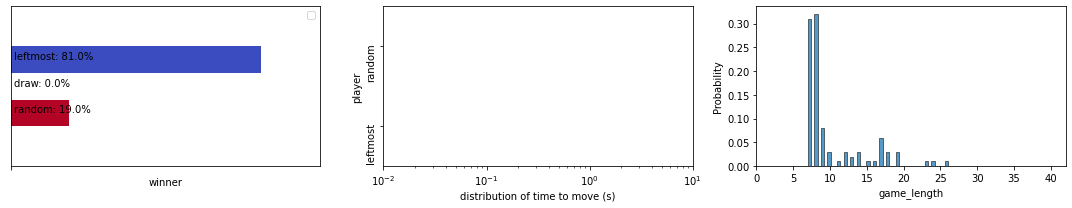

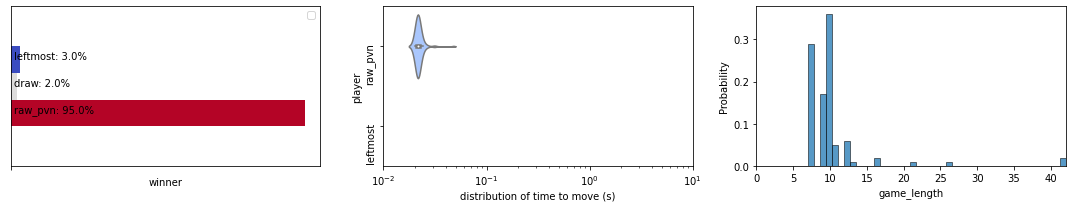

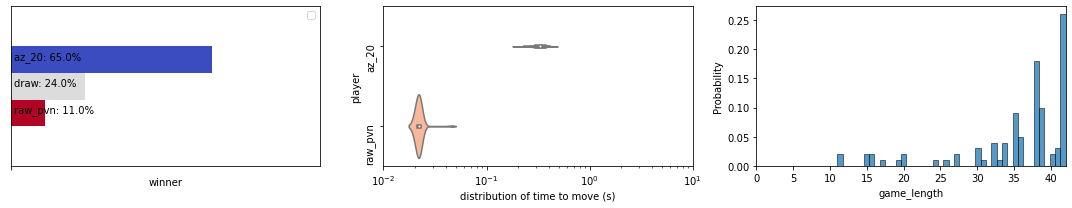

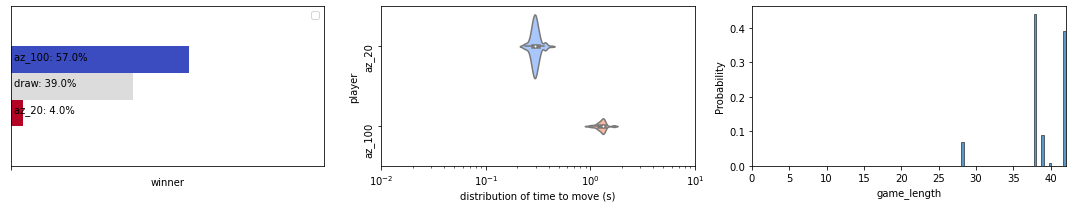

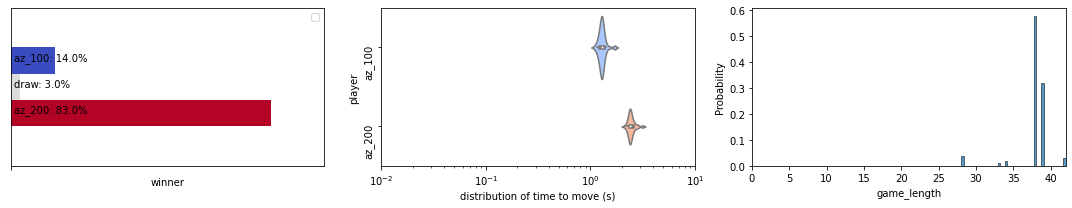

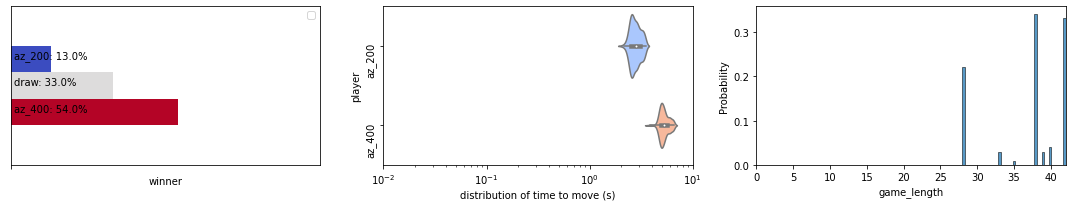

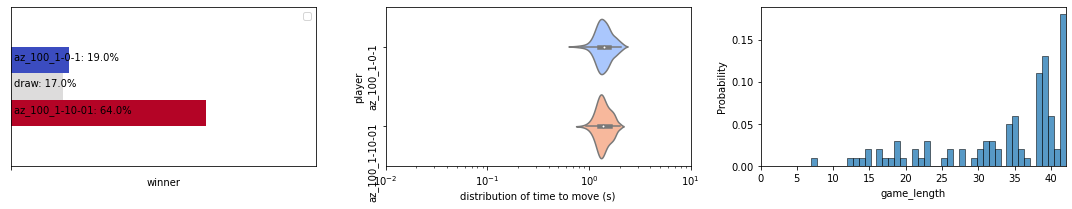

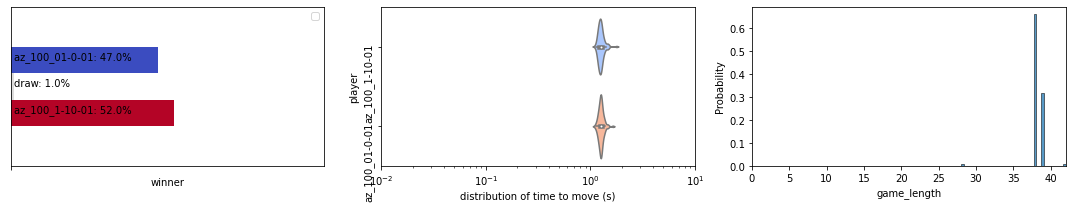

In [12]:
logreader = c4.logging.LogReader(LOGPATH)

for h2h in logreader.list_h2h().index:
    records = logreader.get_records_by_h2h(h2h)
    c4.compete.plot_strat_competition_outcomes(records, FIGDIR)

## Test AZ players vs random

<BarContainer object of 7 artists>

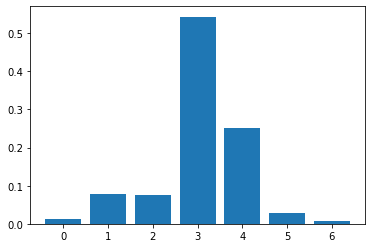

In [193]:
import matplotlib.pyplot as plt

# temperature defines how greedy
temperature = 1
tmp = np.power(policy, 1 / temperature)
plt.bar(xk, tmp / tmp.sum())

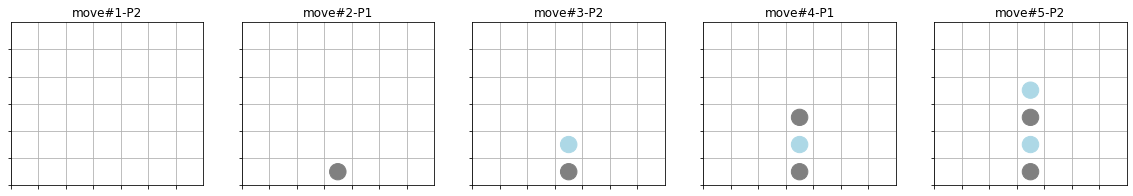

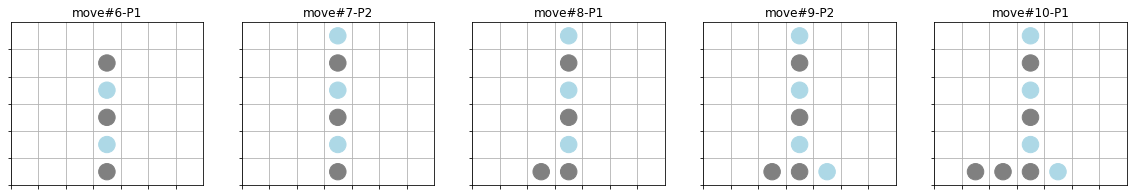

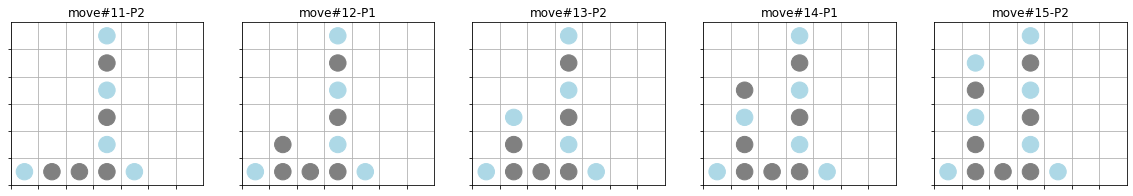

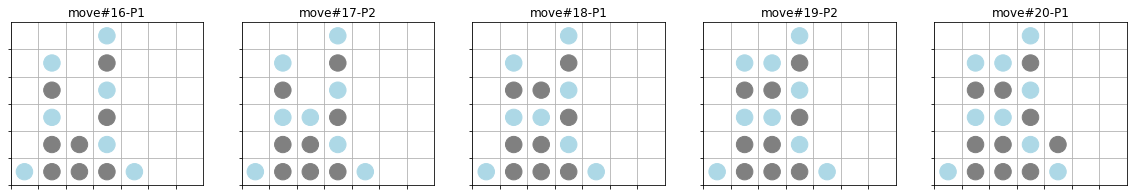

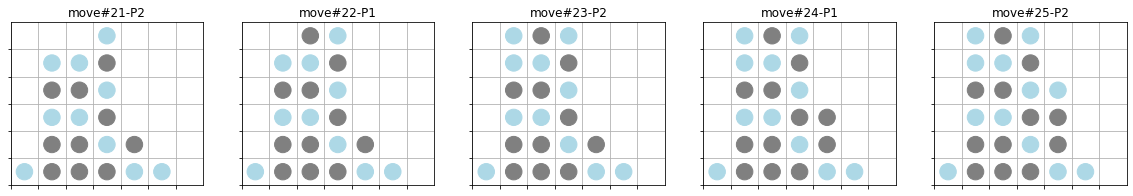

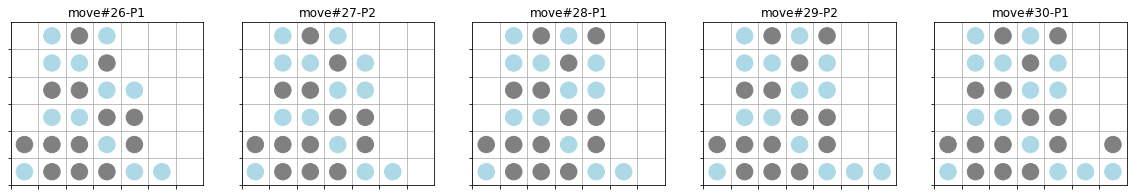

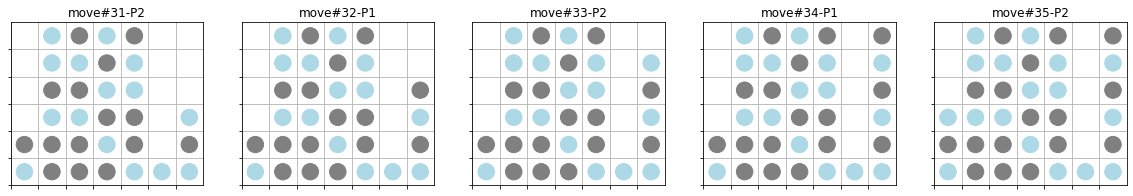

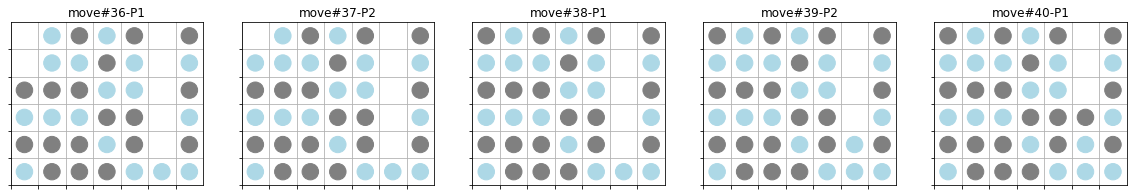

In [76]:
import matplotlib.pyplot as plt
data = c4.train.consolidate_selfplay_from_pickle('../data/gen9_400_003-0-003.pkl')

# get all starting positions
starts = np.where(np.abs(data['input_boards']).sum(axis=1).sum(axis=1)==0)[0]

N = 5
i = 0

i = np.random.choice(len(starts)-1)

input_boards = data['input_boards'][starts[i]:starts[i+1],:,:]
input_players = data['input_next_to_move'][starts[i]:starts[i+1]]
for i, (board, player) in enumerate(zip(input_boards, input_players)):
    if i % N == 0:
        fig, ax = plt.subplots(1, N,figsize=(N * 4,3))
    board = c4.game.ConnectFourBoard.from_array(board)
    state = c4.game.ConnectFourGameState(board=board, next_player=player)
    c4.render.renderConnectFour(state, ax=ax[i % N])
    ax[i % N].set_title(f"move#{i+1}-P{0.5*state.next_player+1.5:.0f}")



In [10]:
board = game.ConnectFourBoard.from_array(np.array([[0,0,1],[1,-1,-1]]))
str(board)

'ConnectFourBoard\n  .  .  X\n  X  O  O'

In [19]:
state = generate_test_state([1,2])
str(state)

'ConnectFourGameState(board:\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  X  O  .  .  .  .\n        \tlast_action=O -> 2\n        \tnext_player=X'

In [47]:
state = generate_test_state([1,1,1,1,1,1])
legal_actions = state.get_legal_actions()
coords = [action.x_coordinate for action in legal_actions]
coords = [0,2,3,4,5,6]

In [14]:
# reload pre-trained evaluator
evaluator = c4.pvnet.PolicyValueNet(filename='../models/gen9.h5', quiet=True)

build_model
Metal device set to: Apple M1 Pro


2022-03-09 14:29:44.747243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-09 14:29:44.747367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


To see model details, enter:
	>>> <pvn>.summary()


To see model details, enter:
	>>> <pvn>.summary()


2022-04-05 21:59:30.109502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


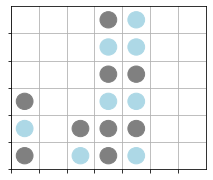

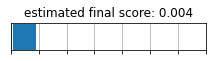

In [15]:
state = generate_test_state([3,4,4,4,3,3,3,3,4,4,3,4,0,2,2,0,0])

c4.render.renderConnectFour(state)
evaluator = c4.pvnet.PolicyValueNet.from_file(filename='../models/gen9.h5')
policy, value = evaluator.infer_from_state(state)
c4.render.render_policy(policy, title=f"estimated final score: {value:.3f}")

In [70]:
positions = [3,3,2]
current_state = c4.game.ConnectFourGameState()
agent = c4.player.AzAgent(evaluator=pvn)
agent.initialize_game()
for position in positions:
    action = c4.game.ConnectFourAction(position, current_state.next_player)
    current_state = current_state.move(action)
    agent.update(action)

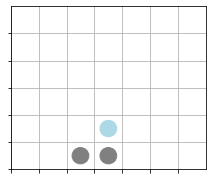

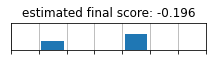

In [74]:
c4.render.renderConnectFour(current_state)
# evaluator = c4.pvnet.PolicyValueNet.from_file(filename='../models/gen9.h5')

action, policy = agent.select_next_action(100)
c4.render.render_policy(policy, title=f"estimated final score: {agent.current_node.V:.3f}")

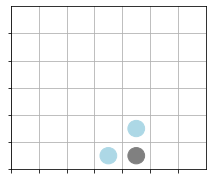

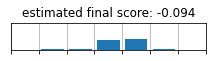

In [168]:
state = c4.game.ConnectFourGameState(np.zeros((6,7)), next_to_move=-1)
actions = [(3,-1),(4,1), (4,-1)]
for action in actions:
    state = state.move(c4.game.ConnectFourAction(*action))
c4.render.renderConnectFour(state)
policy, value = evaluator.infer_from_state(state)
c4.render.render_policy(policy, title=f"estimated final score: {value:.3f}")

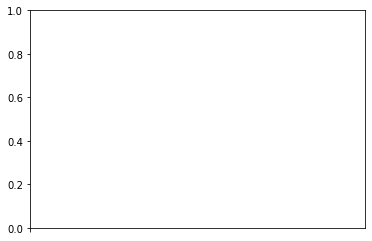

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
_ = ax.set(xticks=[0], xticklabels=[''])
plt.show()

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1339.19it/s]


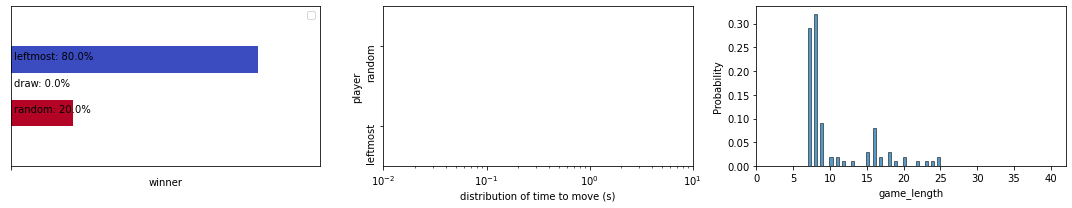

In [24]:
# simulate a few games
compete_and_plot(strat1=c4.strategies.RandomStrategy(),
                 strat2=c4.strategies.LeftMostStrategy(), log=False)
